In [1]:
import pandas as pd

In [11]:
# load the data
SPEAKER_WITH_AFFILIATION_PATH = "../../project_data/data-2.pickle"
df = pd.read_pickle(SPEAKER_WITH_AFFILIATION_PATH)
df.head()

,speaker_id,quote_id,quotation,speaker,party
0,270316,2015-08-31-000271,... a great day for veterans here in Littleton...,Jeanne Shaheen,29552
1,270316,2015-02-03-074650,The safety and security of our nation is at ri...,Jeanne Shaheen,29552
2,270316,2015-05-10-027625,It's been my experience that the faith communi...,Jeanne Shaheen,29552
3,270316,2015-09-01-113454,we need to bring the parents in so they can se...,Jeanne Shaheen,29552
4,270316,2015-11-11-069028,"Listen, a month ago people were saying Hillary...",Jeanne Shaheen,29552


In [12]:
df.shape

(17388599, 5)

In [13]:
# ten most common speakers
df["speaker"].value_counts()[:10]

Donald Trump          728233
Barack Obama          156738
Narendra Modi         147384
Hillary Clinton       100493
Bernie Sanders         85055
Theresa May            67498
Benjamin Netanyahu     65903
Rodrigo Duterte        64604
Joe Biden              58637
Vladimir Putin         56213
Name: speaker, dtype: int64

In [14]:
# not that many repeating names anymore, makes more sense
speakers = df[["speaker", "speaker_id"]].drop_duplicates()
speakers["speaker"].value_counts()

Bob Smith          3
Wilson Lima        2
Chen Chien-jen     2
Bill Flynn         2
Henry Stern        2
                  ..
Seth Whipper       1
Patricia Hollis    1
Aga Muhlach        1
Thierry Saussez    1
Robert Majka       1
Name: speaker, Length: 62306, dtype: int64

In [15]:
df["party"].value_counts()

29468       4685744
29552       4097879
10230        638957
9626         543713
9630         371477
             ...   
47391604          1
3874898           1
3825694           1
852230            1
3326783           1
Name: party, Length: 3338, dtype: int64

In [20]:
# US: Q29468 is the republican party, Q29552 is the Democratic party
# UK: Q9626 is the Conservative party, Q9630 is the Labour party, Q622441 is the Liberal Party
# AU: Q216082 is the Australian Labor party, Q241149 is the Liberal party of Australia, 

In [21]:
# split into democrats and republicans
democrats = df[df["party"] == 29552]
republicans = df[df["party"] == 29468]

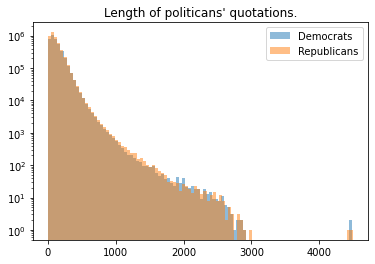

In [23]:
# example analysis
import matplotlib.pyplot as plt

democrats_lengths = democrats["quotation"].apply(lambda x: len(x))
republicans_lengths = republicans["quotation"].apply(lambda x: len(x))

plt.hist(democrats_lengths, log=True, alpha=0.5, label="Democrats", bins = 100)
plt.hist(republicans_lengths, log=True, alpha=0.5, label = "Republicans", bins = 100)
plt.title("Length of politicans' quotations.")
plt.legend()
plt.show()